In [1]:
import numpy as np
import cv2
import tensorflow as tf
import os
import sklearn as sk
import sklearn.model_selection
from imutils import paths
from skimage import io
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

tf.__version__

'2.1.0'

In [2]:
#INIT_LR = 1e-3
#EPOCHS = 10
#BS = 8
dataset = "C:/Users/User/Documents/python/pelagem_gatos/imagens"
dataset

'C:/Users/User/Documents/python/pelagem_gatos/imagens'

In [3]:
args={}
args["dataset"]=dataset
args

{'dataset': 'C:/Users/User/Documents/python/pelagem_gatos/imagens'}

In [15]:
iPaths = list(paths.list_images(args["dataset"]))  #image paths
data = []
labels = []
for iPath in iPaths:    
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = io.imread(iPath, True)#cv2.imread(iPath)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  #Resizing the images
    
    data.append(image)
    labels.append(label)


data = np.array(data) / 255.0
labels = np.array(labels)
labels

array(['bicolor', 'bicolor', 'bicolor', ..., 'tortoiseshell',
       'tortoiseshell', 'tortoiseshell'], dtype='<U14')

In [16]:
data

array([[[0.0014197 , 0.00166378, 0.00167277, ..., 0.00090314,
         0.00093654, 0.00109075],
        [0.00134571, 0.00151525, 0.00155113, ..., 0.00098832,
         0.00103173, 0.00119342],
        [0.00121577, 0.0014284 , 0.00152051, ..., 0.00109101,
         0.00107276, 0.00125056],
        ...,
        [0.00013406, 0.00066315, 0.00079079, ..., 0.00034039,
         0.0003686 , 0.00072473],
        [0.00021666, 0.00081292, 0.00074778, ..., 0.00042173,
         0.00065203, 0.00097064],
        [0.00045614, 0.00050721, 0.00067643, ..., 0.00063427,
         0.00061218, 0.00082132]],

       [[0.00041344, 0.00041509, 0.00026937, ..., 0.00082077,
         0.00083776, 0.00060692],
        [0.00032089, 0.00040118, 0.00028405, ..., 0.000816  ,
         0.00072228, 0.00075043],
        [0.00027008, 0.00036206, 0.00031759, ..., 0.00070123,
         0.00063623, 0.00074731],
        ...,
        [0.00024395, 0.0002957 , 0.00027636, ..., 0.00016051,
         0.00019749, 0.00019365],
        [0.0

In [17]:

LB = sk.preprocessing.LabelBinarizer()  #Initialize label binarizer
labelsCat = LB.fit_transform(labels)
labelsCat.shape
#labelsCat = to_categorical(labelsCat); print(labelsCat)

(5726, 9)

In [18]:
(X_train, X_test, Y_train, Y_test) = sk.model_selection.train_test_split(data, labelsCat,
    test_size=0.33, stratify=labels, random_state=42)
X_train

array([[[1.47377226e-03, 1.42682042e-03, 1.43053177e-03, ...,
         3.18675125e-03, 3.18675125e-03, 3.20434756e-03],
        [1.44863801e-03, 1.47098917e-03, 1.38898486e-03, ...,
         3.15815302e-03, 3.15815302e-03, 3.16363860e-03],
        [1.44666682e-03, 1.40950199e-03, 1.33612429e-03, ...,
         3.13609073e-03, 3.15523549e-03, 3.15368704e-03],
        ...,
        [2.83211853e-03, 2.87365475e-03, 2.90441215e-03, ...,
         1.02150814e-03, 9.35961518e-04, 8.99871252e-04],
        [2.84289735e-03, 2.87207569e-03, 2.90441215e-03, ...,
         9.22804141e-04, 9.44299106e-04, 8.54995152e-04],
        [2.83322733e-03, 2.84558521e-03, 2.87476355e-03, ...,
         9.33835784e-04, 9.42153143e-04, 8.70700063e-04]],

       [[1.42107920e-03, 1.55175892e-03, 1.60455640e-03, ...,
         1.75105980e-03, 1.77168576e-03, 1.68023741e-03],
        [1.49741446e-03, 1.37069711e-03, 1.52703519e-03, ...,
         1.85447371e-03, 1.82030324e-03, 1.69872519e-03],
        [1.47409926e-03, 

In [19]:
Y_train.shape

(3836, 9)

In [20]:
batch_size = 16
epochs = 15
total_mining_iterations = 3
num_classes = 9

In [24]:
model = tf.keras.models.Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=(224,224,1), name='conv1'))
model.add(Activation('relu', name='conv1_act'))
model.add(Conv2D(32, (3, 3), name='conv2'))
model.add(Activation('relu', name='conv2_act'))
model.add(MaxPooling2D(pool_size=(2, 2), name='pool1'))
model.add(Dropout(0.25, name='pool1_drop'))

model.add(Conv2D(64, (3, 3), padding='same', name='conv3'))
model.add(Activation('relu', name='conv3_act'))
model.add(Conv2D(64, (3, 3), name='conv4'))
model.add(Activation('relu', name='conv4_act'))
model.add(MaxPooling2D(pool_size=(2, 2), name='pool2'))
model.add(Dropout(0.25, name='pool2_drop'))

model.add(Flatten(name='flat1'))

model.add(Dense(512, name='fc5'))
model.add(Activation('relu', name='fc5_act'))
model.add(Dropout(0.5, name='fc5_drop'))
model.add(Dense(512, name='fc6'))
model.add(Activation('relu', name='fc6_act'))
model.add(Dropout(0.5, name='fc6_drop'))
model.add(Dense(num_classes, name='out'))
model.add(Activation('softmax', name='out_act'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 224, 224, 32)      320       
_________________________________________________________________
conv1_act (Activation)       (None, 224, 224, 32)      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 222, 222, 32)      9248      
_________________________________________________________________
conv2_act (Activation)       (None, 222, 222, 32)      0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 111, 111, 32)      0         
_________________________________________________________________
pool1_drop (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv3 (Conv2D)               (None, 111, 111, 64)     

In [25]:
# initiate RMSprop optimizer
opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile classifier
model.compile(loss='categorical_crossentropy',
optimizer=opt,
metrics=['accuracy'])

In [26]:
with tf.device('/GPU:0'):
   R = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test), shuffle=True)
R

ValueError: Error when checking input: expected conv1_input to have 4 dimensions, but got array with shape (3836, 224, 224)

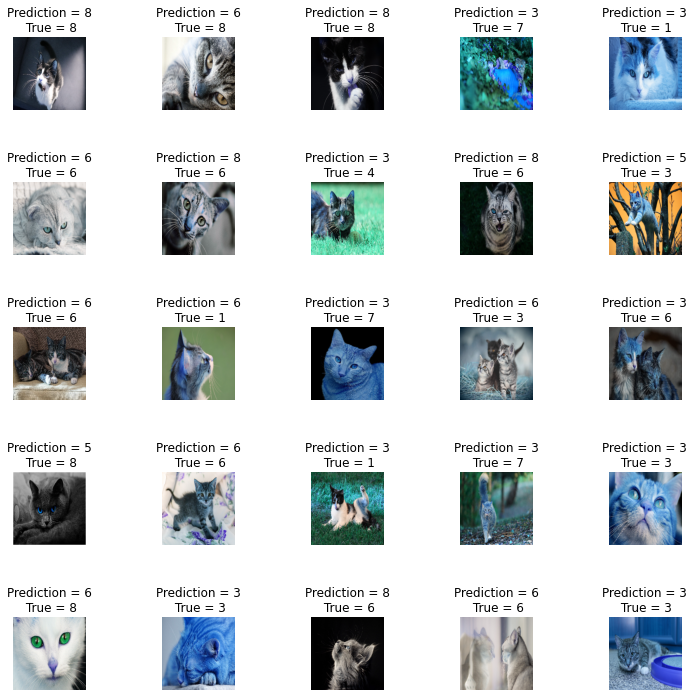

In [14]:
import matplotlib.pyplot as plt
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=batch_size)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1) 

In [22]:
from sklearn.metrics import classification_report
y_pred0 = model.predict(X_test, batch_size=batch_size)
y_pred = np.argmax(y_pred0, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

                    precision    recall  f1-score   support

           Bicolor       0.00      0.00      0.00         1
            Calico       0.00      0.00      0.00        11
          Hairless       0.00      0.00      0.00         3
    Tabby_Mackerel       0.45      0.70      0.55        33
     Tortoiseshell       0.00      0.00      0.00         7
 solid_color_black       0.36      0.38      0.37        13
  solid_color_grey       0.30      0.44      0.35        25
solid_color_orange       0.00      0.00      0.00        14
 solid_color_white       0.27      0.32      0.29        22

          accuracy                           0.36       129
         macro avg       0.15      0.20      0.17       129
      weighted avg       0.25      0.36      0.30       129



C:\Users\User\anaconda3\envs\gatos-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

0.35658914728682173

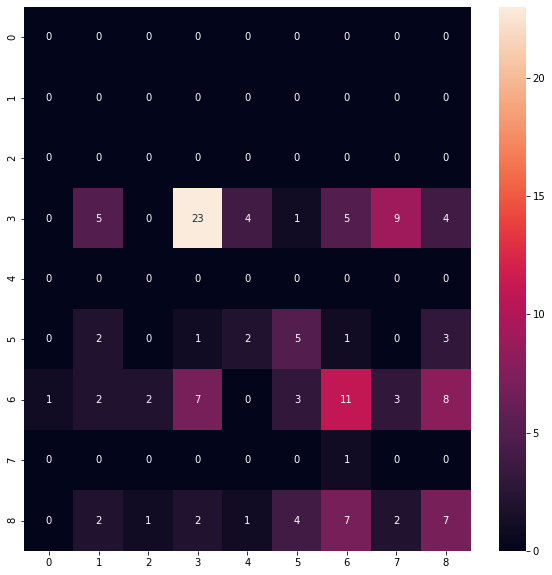

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_pred, Y_test.argmax(axis=1))
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

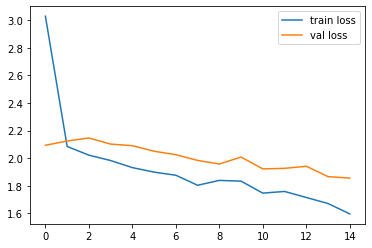

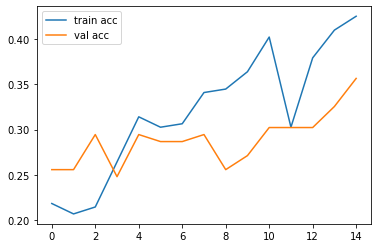

In [18]:
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()